In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv('International_Education_Costs.csv')
df.head()
df2=df.copy()
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00


In [20]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


### - Top 10 the most expensive countries for international students

In [36]:
total_cost= df.Tuition_USD +df.Rent_USD*12*df.Duration_Years + df.Insurance_USD + df.Visa_Fee_USD

total_cost.name="Total_Cost"

In [43]:
total=total_cost.groupby(df["Country"]).sum()
total.sort_values(ascending=False).head(10)

Country
USA            9685380.0
Australia      7263900.0
UK             6663955.0
Canada         5493260.0
Singapore      1579720.0
Switzerland    1034576.0
France          967523.0
Germany         958775.0
Netherlands     941228.0
Italy           597890.0
Name: Total_Cost, dtype: float64

### -Compare the costs adjusted to the exchange rate

In [47]:
after_exchange=total_cost*df.Exchange_Rate
after_exchange.name="After_Exchange"

In [59]:
after_exchange.groupby(df["Country"]).sum().sort_values(ascending=False).round(2).head(10)

Country
Iran           3.133852e+09
Lebanon        2.262150e+09
Indonesia      1.919789e+09
Uzbekistan     7.408290e+08
South Korea    7.309061e+08
Vietnam        6.154065e+08
Colombia       3.576330e+08
Japan          6.096481e+07
Hungary        4.995966e+07
Argentina      3.498242e+07
Name: After_Exchange, dtype: float64

### - Which cities are the most accessible for students

In [56]:
access_score= (df.Rent_USD+df.Living_Cost_Index)/100
access_score.name="Access_Score"

In [58]:
access_score.groupby(df.City).sum().sort_values(ascending=False).round(2)

City
Singapore    265.76
Sydney       212.19
Melbourne    189.99
London       186.50
Seattle      126.80
              ...  
Sylhet         1.97
Tlemcen        1.93
Gabes          1.90
Aswan          1.88
Bizerte        1.80
Name: Access_Score, Length: 556, dtype: float64

### - Visualize the cost per level (Bachelor vs Masters vs PhD)

In [64]:
df["Total_Cost"] = total_cost


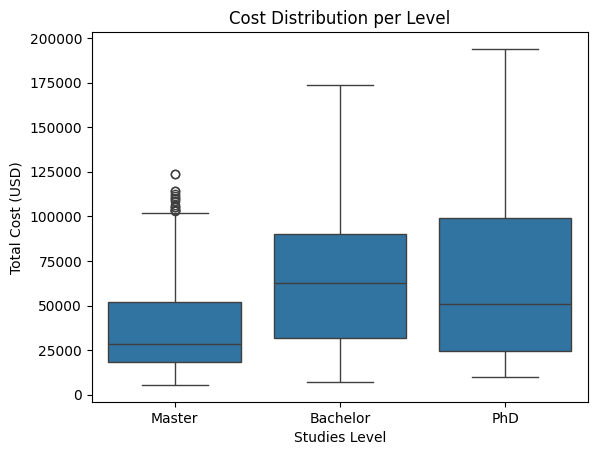

In [66]:

sns.boxplot(x="Level", y="Total_Cost", data=df)
plt.title("Cost Distribution per Level")
plt.xlabel("Studies Level")
plt.ylabel("Total Cost (USD)")
plt.show()

### - Analyze the country with the best quality education with fewer costs

In [87]:
efficency_score=1000 / (df["Tuition_USD"] + df["Living_Cost_Index"] * 100)
efficency_score.name="Efficiency_Score"

In [88]:
df["Efficiency_Score"]=efficency_score.round(4)
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost,Efficiency_Score
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,109860.0,0.0157
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0,0.0205
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,78035.0,0.0219
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,76700.0,0.0204
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,27525.0,0.1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92,28949.0,0.0907
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65,21720.0,0.0844
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75,19600.0,0.0942
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00,171660.0,0.0173


In [90]:
efficency_score.groupby(df.Country).sum().sort_values(ascending=False).round(2)

Country
Germany           4.74
Greece            2.74
UK                2.56
France            2.34
Canada            2.22
                  ... 
South Africa      0.09
Taiwan            0.09
Czech Republic    0.07
Israel            0.05
Hong Kong         0.03
Name: Efficiency_Score, Length: 71, dtype: float64

In [110]:
df.Efficiency_Score=pd.qcut(efficency_score,q=4,labels=["Low","Medium","Normal","High"])
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost,Efficiency_Score
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,109860.0,Low
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0,Low
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,78035.0,Low
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,76700.0,Low
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,27525.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92,28949.0,Normal
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65,21720.0,Normal
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75,19600.0,Normal
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00,171660.0,Low


### -How the cost varies by the program

/var/folders/cb/yp5287ws4zbgvbcyhyvlt4kc0000gn/T/ipykernel_61778/3586711462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tuition.values, y=avg_tuition.index, palette="viridis")


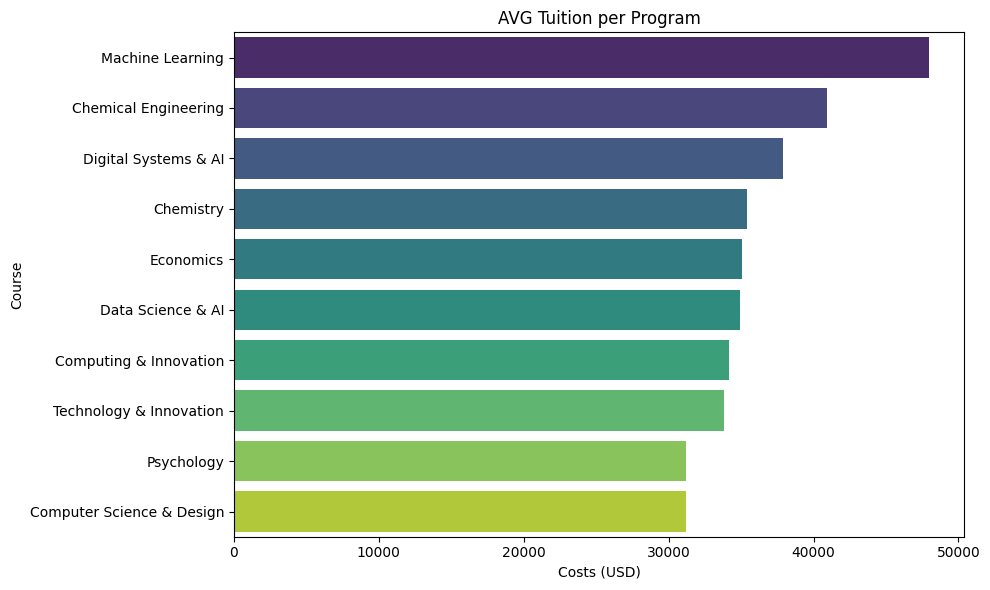

In [109]:
avg_tuition = df.groupby("Program")["Tuition_USD"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_tuition.values, y=avg_tuition.index, palette="viridis")
plt.xlabel("Costs (USD)")
plt.ylabel("Course")
plt.title("AVG Tuition per Program")
plt.tight_layout()
plt.show()